# Задание 1.

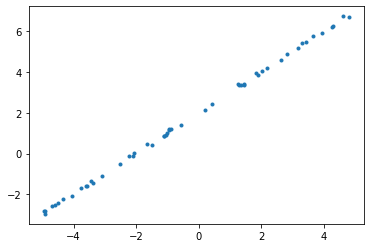

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from criteria import StopLossCriteria
from gradient import gradient
from graphic import F
from loss import AbsoluteLoss

F().draw()

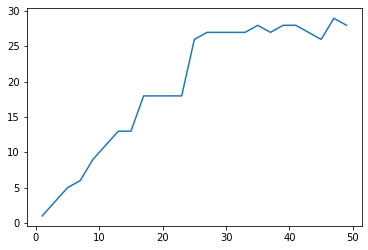

In [2]:
f = F()
batch_sizes = [i for i in range(1, f.points_x.shape[0] + 1, 2)]
w = np.array([0, 0])
epoches = np.array([gradient(f, 0.1, w, AbsoluteLoss(), 5000, batch_size, StopLossCriteria(), f.noise_sum)[0]
                            for batch_size in batch_sizes])
plt.plot(batch_sizes, epoches)
plt.show()